In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

In [13]:
df = pd.read_csv(uci_path)

In [14]:
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [17]:
print(df.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [18]:
X = df.iloc[:,:]

In [20]:
print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [21]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [22]:
print(X[:5])

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [23]:
from sklearn import cluster

In [26]:
kmeans = cluster.KMeans(init='k-means++',n_clusters=5,n_init=10)

In [27]:
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10)

In [38]:
cluster_label = kmeans.labels_
print(cluster_label)

[4 4 4 0 4 4 4 4 0 4 4 4 4 4 4 0 4 0 4 0 4 0 0 2 4 4 0 0 4 0 0 0 0 0 0 4 0
 4 4 0 0 0 4 4 4 4 4 1 4 4 0 0 4 4 0 0 1 4 0 0 4 1 4 4 0 1 0 4 0 0 0 2 0 4
 4 0 0 4 0 0 0 4 4 0 4 1 1 2 0 0 0 0 1 2 4 0 4 0 0 0 4 4 4 2 0 0 4 4 4 4 0
 4 0 0 0 0 0 0 0 0 0 0 0 4 0 2 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0
 0 0 0 0 0 0 0 4 4 0 4 4 4 0 0 4 4 4 4 0 0 0 4 4 0 4 0 4 0 0 0 0 0 2 0 2 0
 0 0 0 4 4 0 0 0 4 0 0 3 4 3 3 4 4 3 3 3 4 3 3 3 4 3 1 3 3 4 3 4 3 4 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 1 3 3 3 3 3 3 3
 3 3 3 3 3 4 3 4 3 4 3 3 3 3 0 0 0 0 0 0 4 0 4 0 0 2 0 0 0 0 0 0 0 0 4 3 4
 3 4 4 3 4 4 4 4 4 4 4 3 3 4 3 3 4 3 3 4 3 3 3 4 3 3 3 3 3 2 3 3 3 3 3 4 3
 1 3 4 3 3 3 3 4 4 0 4 0 0 4 4 0 4 0 4 0 4 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0
 4 0 0 4 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0
 4 4 0 0 0 0 0 0 4 4 0 4 0 0 4 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]


In [31]:
df['Cluster'] = cluster_label

In [37]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,4


<Axes: xlabel='Grocery', ylabel='Frozen'>

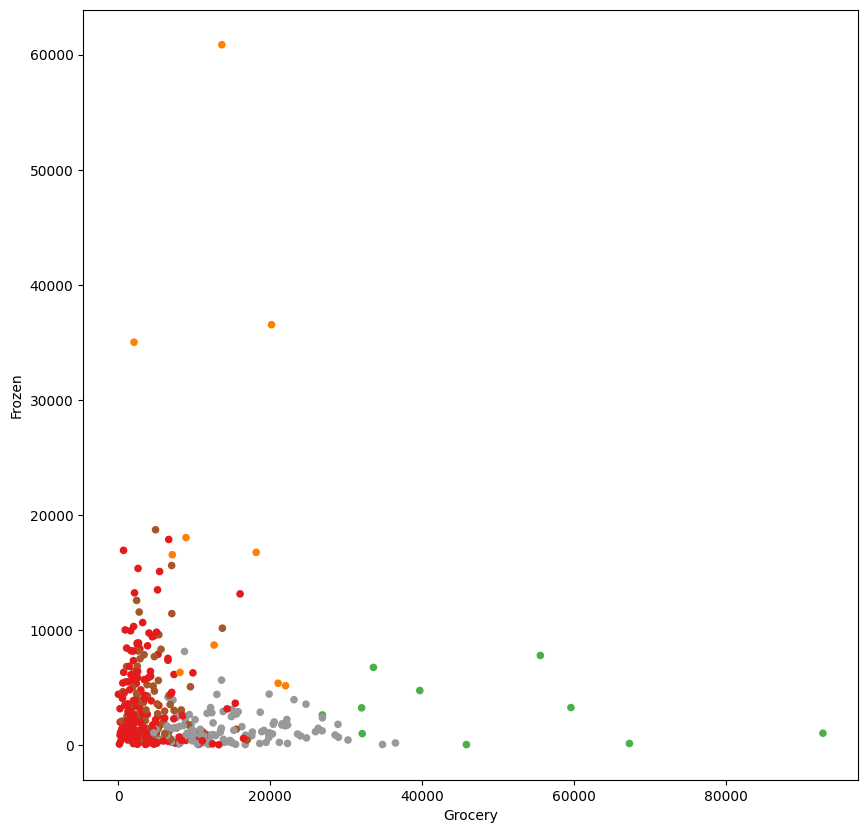

In [33]:
df.plot(kind='scatter',x='Grocery',y='Frozen', c = 'Cluster', cmap = 'Set1',colorbar=False, figsize= (10,10))

<Axes: xlabel='Milk', ylabel='Delicassen'>

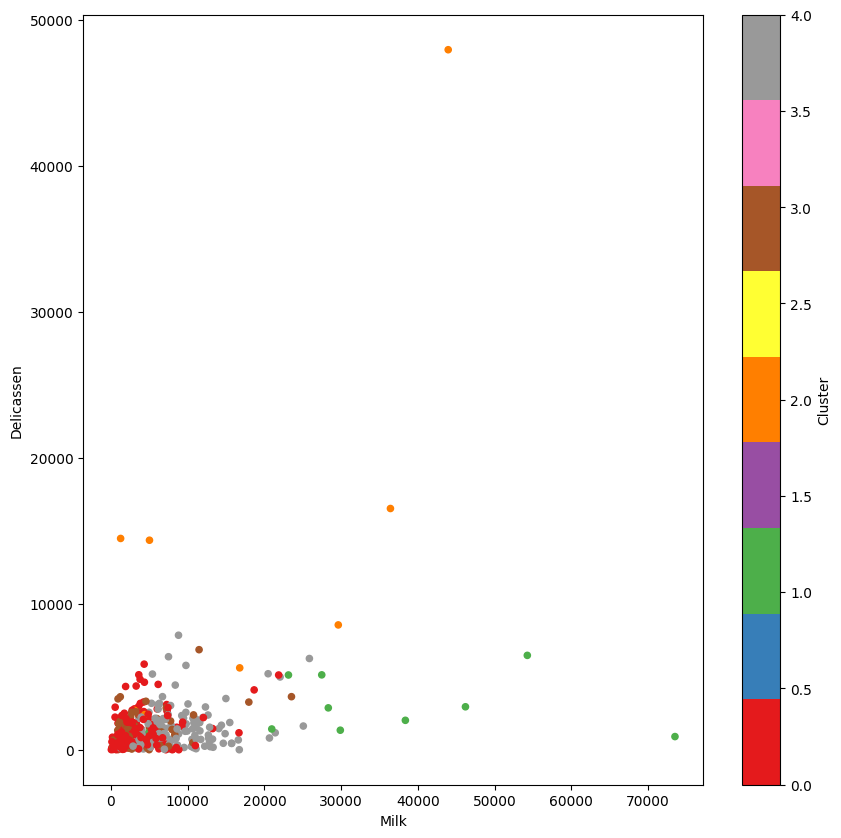

In [34]:
df.plot(kind='scatter',x='Milk',y='Delicassen', c = 'Cluster', cmap = 'Set1',colorbar=True, figsize= (10,10))

In [35]:
plt.show()

In [36]:
plt.close()

In [53]:
import requests
import pandas as pd
import pymysql
import random
from tqdm import tqdm
import time
import math
import sys
import json

data = sys.argv[1:]
tier = "GOLD"
# tier = data[0]
api_key = 'RGAPI-e674eb69-7d34-41d9-adfb-e43ad16950ca'
num = 3


def connect_mysql(db='mydb'):
    conn = pymysql.connect(host='svc.sel4.cloudtype.app', port=32509,
                        user='root', password='1234',
                        db=db, charset='utf8')
    return conn


def sql_execute(conn, query):
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    return result


def get_puuid(nickname, tag):
    url = f'https://asia.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{nickname}/{tag}?api_key={api_key}'
    res = requests.get(url).json()
    puuid = res['puuid']
    return puuid


def get_match_id(puuid,num):
    url = f'https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?type=ranked&start=0&count={num}&api_key={api_key}'
    match_list = requests.get(url).json()
    return match_list
#rabjed 솔로,자유 포함 ,queue로 하면 원하는 랭크 뽑을 수 있음

def get_matches_timelines(matchid):
    url1 = f'https://asia.api.riotgames.com/lol/match/v5/matches/{matchid}?api_key={api_key}'
    url2 = f'https://asia.api.riotgames.com/lol/match/v5/matches/{matchid}/timeline?api_key={api_key}'
    matches = requests.get(url1).json()
    timelines = requests.get(url2).json()
    return matches, timelines

def get_rawdata(tier):
    division_list = ['I','II','III','IV']
    lst = []
    page = random.randrange(1,20)
 
    
    for division in tqdm(division_list):
        url = f'https://kr.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/{tier}/{division}?page={page}&api_key={api_key}'
        res = requests.get(url).json()
        lst += random.sample(res,3)
    # lst라는 변수에서 summonerId만 리스트에 담기
    summoner_id_list = list(map(lambda x:x['summonerId'] ,lst))
    # summonerId가 담긴 리스트를 통해 puuId
  
    puu_id_list = []
    for summoner_id in tqdm(summoner_id_list):
        url = f'https://kr.api.riotgames.com/lol/summoner/v4/summoners/{summoner_id}?api_key={api_key}'
        res = requests.get(url).json()
        puu_id = res['puuid']
        puu_id_list.append(puu_id)
    

    match_id_list = []
    #puuId를 통해 matchId를 가져오기 -> 3개씩 담기
    for puu_id in tqdm(puu_id_list):
        match_ids = get_match_id(puu_id,3)
        match_id_list.extend(match_ids)
  
    df_create = []
    for match_id in tqdm(match_id_list):
        matches,timelines = get_matches_timelines(match_id)
        df_create.append([match_id,matches,timelines])
    #matches,timeline을 불러서 이중리스트를 만들고 데이터프레임으로 만들어서 - [match_id,matches,timelines]
    df =pd.DataFrame(df_create,columns = ['match_id','matches','timelines'])
    return df


def get_match_timeline_df(df,tier):
    # df를 한개로 만들기
    dfs_creates = []

    for i in tqdm(range(len(df))):       
        # matches 관련된 데이터 
        try:
            for j in range(len(df.iloc[i].matches['info']['participants'])):
                tmp = []
                tmp.append(df.iloc[i].match_id)
                tmp.append(df.iloc[i].matches['info']['participants'][j]['championName'])
                tmp.append(df.iloc[i].matches['info']['participants'][j]['teamId']) #100:블루 200:레드

                tmp.append(df.iloc[i].matches['info']['participants'][j]['kills'])
                tmp.append(df.iloc[i].matches['info']['participants'][j]['assists'])
                tmp.append(df.iloc[i].matches['info']['participants'][j]['deaths'])

                if(df.iloc[i].matches['info']['participants'][j]['deaths'] == 0):
                    kda = df.iloc[i].matches['info']['participants'][j]['kills'] + df.iloc[i].matches['info']['participants'][j]['assists']
                else :
                    kda = (df.iloc[i].matches['info']['participants'][j]['kills'] + df.iloc[i].matches['info']['participants'][j]['assists'] )/ df.iloc[i].matches['info']['participants'][j]['deaths']    
                tmp.append(kda)

                tmp.append(df.iloc[i].matches['info']['participants'][j]['totalTimeSpentDead'])
                tmp.append(df.iloc[i].matches['info']['participants'][j]['visionWardsBoughtInGame'])
                tmp.append(df.iloc[i].matches['info']['participants'][j]['visionScore'])
                tmp.append(df.iloc[i].matches['info']['participants'][j]['win'])
                tmp.append(df.iloc[i].matches['info']['participants'][j]['riotIdGameName']) #게임아이디
                tmp.append(df.iloc[i].matches['info']['participants'][j]['riotIdTagline']) #태그
                tmp.append(df.iloc[i].matches['info']['participants'][j]['goldEarned']) #총 골드량
                tmp.append(df.iloc[i].matches['info']['participants'][j]['totalDamageDealtToChampions']) # 챔피언에게 가한 피해량
                tmp.append(df.iloc[i].matches['info']['participants'][j]['totalMinionsKilled']) #전체 미니언킬
                tmp.append(df.iloc[i].matches['info']['participants'][j]['wardsPlaced']) #와드 설치수
                tmp.append(df.iloc[i].matches['info']['participants'][j]['puuid']) #puuid

                tmp.append(df.iloc[i].matches['info']['participants'][j]['championId']) #챔피언아이디
                tmp.append(df.iloc[i].matches['info']['participants'][j]['participantId'])#경기자번호
                tmp.append(df.iloc[i].matches['info']['queueId']) #큐아이디
                tmp.append(df.iloc[i].matches['info']['participants'][j]['teamPosition'])#라인
                tmp.append(df.iloc[i].matches['info']['participants'][j]['totalDamageTaken']) #총 맞은 데미지
                tmp.append(df.iloc[i].matches['info']['participants'][j]['totalTimeCCDealt']) #총 cc기에 걸려있던 시간
                tmp.append(df.iloc[i].matches['info']['participants'][j]['onMyWayPings'])
                tmp.append(df.iloc[i].matches['info']['participants'][j]['enemyVisionPings'])
                tmp.append(df.iloc[i].matches['info']['participants'][j]['summonerId'])
                tmp.append(tier)
                
                dfs_creates.append(tmp)
        except Exception as e:
     
            continue
    
    columns = ['matchId','championName', 'teamId', 'kills', 'assists', 'deaths', 'kda','totalTimeSpentDead','visionWardsBoughtInGame','visionScore','win'
               ,'riotIdGameName','riotIdTagline','goldEarned','totalDamageDealtToChampions'
               ,'totalMinionsKilled','wardsPlaced','puuid','championId','participantId','queueId','teamPosition','totalDamageTaken'
               ,'totalTimeCCDealt','onMyWayPings','enemyVisionPings','summonerId','tier']
    df = pd.DataFrame(dfs_creates, columns=columns)
    #27
    return df


def insert_matches_timeline_mysql(row, conn):

    query = (
        f"INSERT ignore INTO riottvT (matchId,championName, teamId, kills, assists,deaths,kda,totalTimeSpentDead,visionWardsBoughtInGame,visionScore,win"
        f",riotIdGameName,riotIdTagline,goldEarned,totalDamageDealtToChampions"
        f",totalMinionsKilled,wardsPlaced,puuid,championId,participantId,queueId,teamPosition,totalDamageTaken"
        f",totalTimeCCDealt,onMyWayPings,enemyVisionPings,summonerId,tier"
        f")"
        f"VALUES (\'{row.matchId}\',\'{row.championName}\',\'{row.teamId}\',\'{row.kills}\', \'{row.assists}\', \'{row.deaths}\', \'{row.kda}\' "
        f", \'{row.totalTimeSpentDead}\', \'{row.visionWardsBoughtInGame}\',\'{row.visionScore}\',\'{row.win}\' ,\'{row.riotIdGameName}\'"
        f", \'{row.riotIdTagline}\', \'{row.goldEarned}\',\'{row.totalDamageDealtToChampions}\',\'{row.totalMinionsKilled}\',\'{row.wardsPlaced}\'"
        f", \'{row.puuid}\', \'{row.championId}\',\'{row.participantId}\',\'{row.queueId}\',\'{row.teamPosition}\' ,\'{row.totalDamageTaken}\' "  
        f", \'{row.totalTimeCCDealt}\', \'{row.onMyWayPings}\',\'{row.enemyVisionPings}\',\'{row.summonerId}\',\'{row.tier}\'"  
        f") "  
    )

    sql_execute(conn, query)

def sql_execute(conn, query):
    try:
        cursor = conn.cursor()
        cursor.execute(query)
        conn.commit()
    except Exception as e:
        print(e)
        conn.rollback()
    finally:
        cursor.close()

raw_data = get_rawdata(tier)
df = get_match_timeline_df(raw_data,tier)
conn = connect_mysql()
# 데이터 넣기
df.apply(lambda x: insert_matches_timeline_mysql(x, conn), axis=1)

# commit을 통해 데이터 삽입을 완료한 후에 update 실행
conn.commit()
conn.close()
data = {"result":"성공"}
json_string = json.dumps(data)

print(json_string)


100%|██████████| 36/36 [00:00<00:00, 146.15it/s]


{"result": "\uc131\uacf5"}


In [40]:
raw_data.iloc[0].matches['info']['participants'][0]['onMyWayPings']

0

In [ ]:
['championName', 'teamId', 'kills', 'assists', 'deaths', 'kda','totalTimeSpentDead','visionWardsBoughtInGame','visionScore','win'
               ,'riotIdGameName','riotIdTagline','goldEarned','totalDamageDealtToChampions'
               ,'totalMinionsKilled','wardsPlaced','puuid','championId','participantId','queueId','teamPosition','totalDamageTaken'
               ,'totalTimeCCDealt','onMyWayPings','enemyVisionPings','summonerId']

In [51]:
raw_data.iloc[0].match_id

'KR_6955943343'

{"key": "\uc608\uce21:\ud328", "\uc810\uc218": 0.765}


In [15]:
#-*- coding:utf-8 -*-
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.neighbors import KNeighborsClassifier
import requests
import pymysql
import random
from tqdm import tqdm
import time
import math
kn = KNeighborsClassifier()

#########################
def connect_mysql(db='mydb'):
    conn = pymysql.connect(host='svc.sel4.cloudtype.app', port=32509,
                        user='root', password='1234',
                        db=db, charset='utf8')
    return conn
conn = connect_mysql()
cursor = conn.cursor()
limit_value = str(500) # 리미트값
############################

data = sys.argv[1:]

# print(data)

key = 'key'
# tier = data[1]
# teamPosition = data[2]
# gameDuration = int(data[3])
# kda = float(data[4])
# totalDamageDealtToChampions = int(data[5]/gameDuration)
# goldEarned = int(data[6]/gameDuration)
tier = 'GOLD'
teamPosition = 'TOP'
kda = 10
totalDamageDealtToChampions = 1200
goldEarned = 600
#졌을때 평균 구하기
query = "select gameDuration from riottvT where win = 'FALSE' and teamPosition = '"+teamPosition+"' and tier = " +"'"+ tier + "'" + "limit " + limit_value #질때의 kda
cursor.execute(query)
result = cursor.fetchall()

data = list(result)
lose_gameDuration_List = []
for e in data:
    a, *_ = e
    lose_gameDuration_List.append(a)
#이겼을때 평균 구하기
query = "select gameDuration from riottvT where win = 'TRUE' and teamPosition = '"+teamPosition+"' and tier = " +"'"+ tier + "'" + "limit " + limit_value #질때의 kda
cursor.execute(query)
result = cursor.fetchall()

data = list(result)
win_gameDuration_List = []
for e in data:
    a, *_ = e
    win_gameDuration_List.append(a)



query = "select kda from riottvT where win = 'FALSE' and teamPosition = '"+teamPosition+"' and tier = " +"'"+ tier + "'" + "limit " + limit_value #질때의 kda

cursor.execute(query)
result = cursor.fetchall()

data = list(result)
lose_kda_List = []
for e in data:
    a, *_ = e
    lose_kda_List.append(a)

query = "select totalDamageDealtToChampions from riottvT where win = 'FALSE' and teamPosition = '"+teamPosition+"' and tier = " +"'"+ tier + "'" + "limit " + limit_value #질때의 kda
cursor.execute(query)
result = cursor.fetchall()

data = list(result)
lose_totalDamageDealtToChampions_List = []
for e in data:
    a, *_ = e
    lose_totalDamageDealtToChampions_List.append(a)
#평균값    
lose_Mean_totalDamageDealtToChampions = []
for i in range(len(lose_totalDamageDealtToChampions_List)):
    a = int(lose_totalDamageDealtToChampions_List[i]/lose_gameDuration_List[i])
    lose_Mean_totalDamageDealtToChampions.append(a)



query = "select goldEarned from riottvT where win = 'FALSE' and teamPosition = '"+teamPosition+"' and tier = " +"'"+ tier + "'" +  "limit " + limit_value #질때의 kda
cursor.execute(query)
result = cursor.fetchall()

data = list(result)
lose_goldEarned_List = []
for e in data:
    a, *_ = e
    lose_goldEarned_List.append(a)
#평균값    
lose_Mean_goldEarned = []
for i in range(len(lose_goldEarned_List)):
    a = int(lose_goldEarned_List[i]/lose_gameDuration_List[i])
    lose_Mean_goldEarned.append(a)
###################################################################################################################################################
query1 = "select kda from riottvT where win = 'True' and teamPosition = '"+teamPosition+"' and tier = " +"'"+ tier + "'" +  "limit " + limit_value #이길때의 kda

cursor.execute(query1)
result1 = cursor.fetchall()

data1 = list(result1)

win_kda_List = []
for e in data1:
    a, *_ = e
    win_kda_List.append(a)

query1 = "select totalDamageDealtToChampions from riottvT where win = 'True' and teamPosition = '"+teamPosition+"' and tier = " +"'"+ tier + "'" +  "limit " + limit_value #이길때의 kda
cursor.execute(query1)
result = cursor.fetchall()

data = list(result)
win_totalDamageDealtToChampions_List = []
for e in data:
    a, *_ = e
    win_totalDamageDealtToChampions_List.append(a)
#평균값    
win_Mean_totalDamageDealtToChampions = []
for i in range(len(win_totalDamageDealtToChampions_List)):
    a = int(win_totalDamageDealtToChampions_List[i]/win_gameDuration_List[i])
    win_Mean_totalDamageDealtToChampions.append(a)

query1 = "select goldEarned from riottvT where win = 'True' and teamPosition = '"+teamPosition+"' and tier = " +"'"+ tier + "'" +  "limit " + limit_value #이길때의 kda
cursor.execute(query1)
result = cursor.fetchall()

data = list(result)
win_goldEarned_List = []
for e in data:
    a, *_ = e
    win_goldEarned_List.append(a)
    
#평균값    
win_Mean_goldEarned = []
for i in range(len(win_goldEarned_List)):
    a = int(win_goldEarned_List[i]/win_gameDuration_List[i])
    win_Mean_goldEarned.append(a)


conn.close()
allkda = win_kda_List+lose_kda_List
Mean_totalDamageDealtToChampions = win_Mean_totalDamageDealtToChampions + lose_Mean_totalDamageDealtToChampions
Mean_goldEarned = win_Mean_goldEarned + lose_Mean_goldEarned


tier_data=[[k,t,g]for k, t ,g in zip(allkda,Mean_totalDamageDealtToChampions,Mean_goldEarned)]


tier_target=[1]*len(win_kda_List)+[0]*len(lose_kda_List)

kn.fit(tier_data,tier_target)
a1 = kn.score(tier_data,tier_target)
# kn.score(tier_data,tier_target)
# print(a1)
trans={1:'예측:승', 0:'예측:패'}
a = trans[kn.predict([[kda,totalDamageDealtToChampions,goldEarned]])[0]]

data5 = {key:a , "점수" : a1}
print(a)
print(a1)
json_string = json.dumps(data5)

print(json_string)


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.